In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [16]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Display feature names and class balance
print("Feature Names:", data.feature_names)
print("Class Balance:", pd.Series(y).value_counts())

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Class Balance: 1    357
0    212
Name: count, dtype: int64


Baseline: Decision Tree Model

In [17]:
# 1. Baseline: Decision Tree
# Train a DecisionTreeClassifier without specifying max_depth
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Evaluate Decision Tree model
y_pred_tree = tree_model.predict(X_test)
print("\nDecision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}")
print(f"Precision: {precision_score(y_test, y_pred_tree)}")
print(f"Recall: {recall_score(y_test, y_pred_tree)}")
print(f"F1 Score: {f1_score(y_test, y_pred_tree)}")



Decision Tree Performance:
Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394


Bagging with Decision Tree as Base Estimator

In [18]:
# 2. Bagging with Decision Tree as base estimator
bagging_model = BaggingClassifier(DecisionTreeClassifier(random_state=42), random_state=42)
bagging_model.fit(X_train, y_train)

# Evaluate Bagging model
y_pred_bagging = bagging_model.predict(X_test)
print("\nBagging Performance:")
print(classification_report(y_test, y_pred_bagging))



Bagging Performance:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



AdaBoost with Decision Tree (max_depth=1)

In [19]:
# 3. AdaBoost with Decision Tree (max_depth=1)
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), random_state=42)
adaboost_model.fit(X_train, y_train)

# Evaluate AdaBoost model
y_pred_adaboost = adaboost_model.predict(X_test)
print("\nAdaBoost Performance:")
print(classification_report(y_test, y_pred_adaboost))



AdaBoost Performance:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Bar Chart Plotting of Test Accuracies

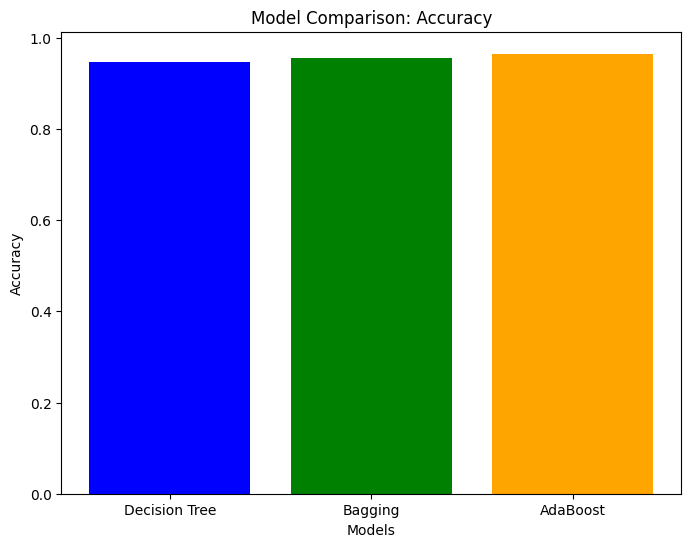

In [20]:
# 4. Bar Chart Plotting of test accuracies
models = ['Decision Tree', 'Bagging', 'AdaBoost']
accuracies = [
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_bagging),
    accuracy_score(y_test, y_pred_adaboost)
]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Comparison: Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()


Random Forest


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



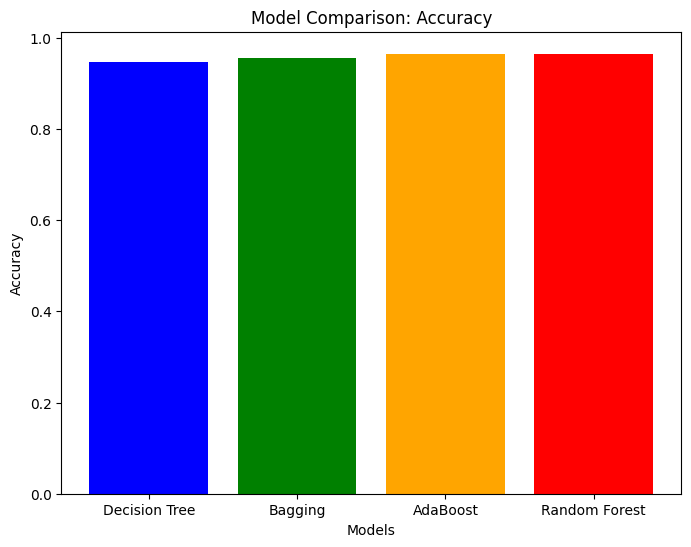

In [21]:
# 5. Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Evaluate Random Forest model
y_pred_rf = random_forest_model.predict(X_test)
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))

# Update Bar Chart with Random Forest
models.append('Random Forest')
accuracies.append(accuracy_score(y_test, y_pred_rf))

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Comparison: Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()


Confusion Matrices



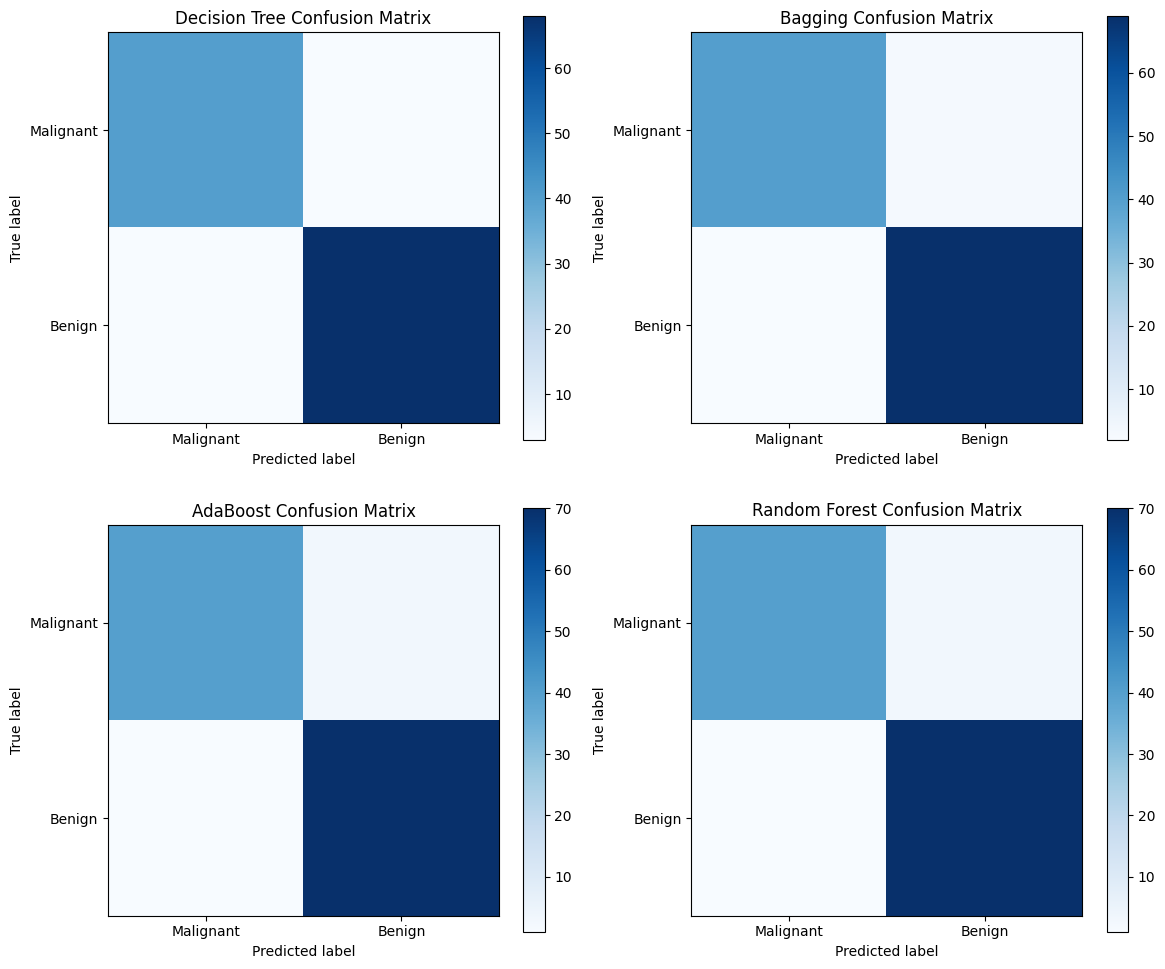

In [22]:
# 6. Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

models_and_predictions = [
    (tree_model, y_pred_tree),
    (bagging_model, y_pred_bagging),
    (adaboost_model, y_pred_adaboost),
    (random_forest_model, y_pred_rf)
]

for ax, (model, preds), name in zip(axes.flatten(), models_and_predictions, models):
    cm = confusion_matrix(y_test, preds)
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Malignant', 'Benign'])
    ax.set_yticklabels(['Malignant', 'Benign'])
    plt.colorbar(ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues), ax=ax)

plt.tight_layout()
plt.show()


Estimators vs. Accuracy (Bagging and AdaBoost)

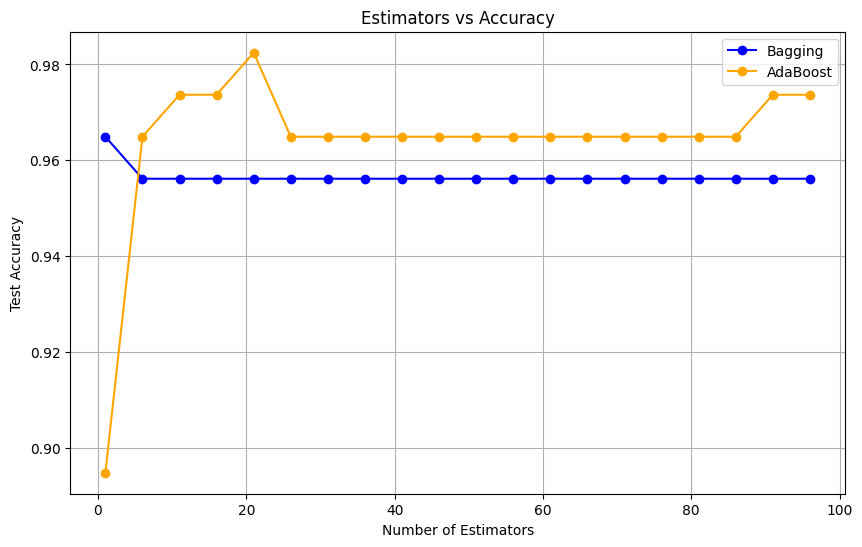

In [23]:
# 7. Estimators vs. Accuracy (Bagging and AdaBoost)
n_estimators_range = range(1, 101, 5)

# Bagging performance with different estimators
bagging_accuracies = []
for n_estimators in n_estimators_range:
    bagging_model = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=n_estimators, random_state=42)
    bagging_model.fit(X_train, y_train)
    y_pred_bagging = bagging_model.predict(X_test)
    bagging_accuracies.append(accuracy_score(y_test, y_pred_bagging))

# AdaBoost performance with different estimators
adaboost_accuracies = []
for n_estimators in n_estimators_range:
    adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), n_estimators=n_estimators, random_state=42)
    adaboost_model.fit(X_train, y_train)
    y_pred_adaboost = adaboost_model.predict(X_test)
    adaboost_accuracies.append(accuracy_score(y_test, y_pred_adaboost))

# Plot line charts for Bagging and AdaBoost
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, bagging_accuracies, label='Bagging', color='blue', marker='o')
plt.plot(n_estimators_range, adaboost_accuracies, label='AdaBoost', color='orange', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.title('Estimators vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Depth Effect (AdaBoost with max_depth=3)


AdaBoost with max_depth=3 Performance:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



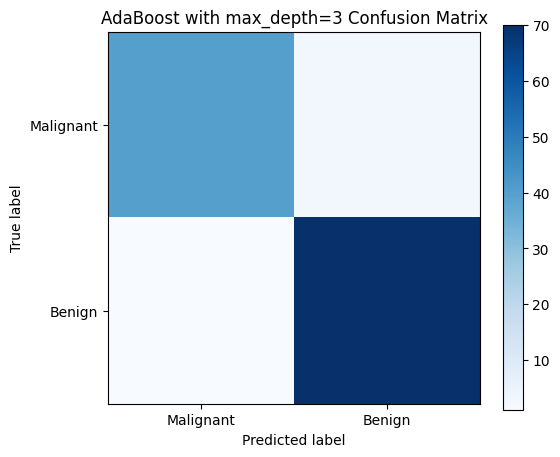

In [24]:
# 8. Depth Effect (AdaBoost with max_depth=3)
adaboost_model_depth3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, random_state=42), random_state=42)
adaboost_model_depth3.fit(X_train, y_train)

# Evaluate AdaBoost model with max_depth=3
y_pred_adaboost_depth3 = adaboost_model_depth3.predict(X_test)
print("\nAdaBoost with max_depth=3 Performance:")
print(classification_report(y_test, y_pred_adaboost_depth3))

# Plot confusion matrix for AdaBoost with max_depth=3
cm_depth3 = confusion_matrix(y_test, y_pred_adaboost_depth3)
plt.figure(figsize=(6, 5))
plt.imshow(cm_depth3, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('AdaBoost with max_depth=3 Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.yticks([0, 1], ['Malignant', 'Benign'])
plt.colorbar()
plt.show()
